In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
# plot baseline 
dfb = pd.read_csv('../../Projections/results_batter.csv')

In [12]:
dfb.rename(columns={'Unnamed: 0':'Model'}, inplace=True)

In [13]:
dfb.set_index(dfb['Model'], inplace=True)

In [14]:
dfb.drop(columns=['Model'], inplace=True)

Text(0.5, 1.0, 'Figure 2')

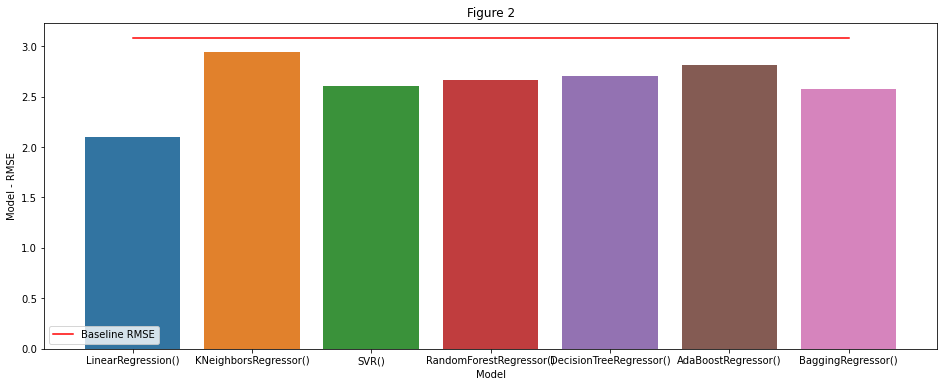

In [15]:
plt.figure(figsize=(16,6))
sns.barplot(data=dfb, x=dfb.index, y='Model - RMSE')
plt.plot(dfb['Baseline - RMSE'], color='red', label='Baseline RMSE')
plt.legend()
plt.title('Figure 2')
#plt.savefig('../Images/batter_baseline');

,Baseline - RMSE,Model - RMSE,R2 Score - Train,R2 Score - Test
Model,,,,
LinearRegression(),3.078159,2.096171,0.930907,0.660084
KNeighborsRegressor(),3.078159,2.944000,0.926268,0.329508
SVR(),3.078159,2.605969,0.951551,0.474641
RandomForestRegressor(),3.078159,2.667530,0.988162,0.449526
DecisionTreeRegressor(),3.078159,2.701446,1.000000,0.435439
AdaBoostRegressor(),3.078159,2.814524,0.914882,0.387187
BaggingRegressor(),3.078159,2.573038,0.982447,0.487834


In [139]:
value = [row for row in dfb['Model - RMSE']]

In [140]:
x_data = [x for x in dfb.index]

In [141]:
base = [row for row in dfb['Baseline - RMSE']]

In [142]:
p = figure(x_range=x_data, plot_height=450, plot_width=975,title='Figure 2: Batter Baseline RMSE vs Model RMSE')
p.vbar(x=x_data, top=value, width=.9, fill_alpha=.65)
p.line(x=x_data, y=base, line_width=5, line_color='orange', legend='Baseline', line_alpha=.65)
p.legend.location = 'center_right'

In [143]:
show(p)

In [16]:
# plot baseline 
dfb1 = pd.read_csv('../../Projections/results_pitcher.csv')

In [17]:
dfb1.rename(columns={'Unnamed: 0':'Model'}, inplace=True)

In [18]:
dfb1.set_index(dfb1['Model'], inplace=True)

In [19]:
dfb1.drop(columns=['Model'], inplace=True)

Text(0.5, 1.0, 'Figure 4')

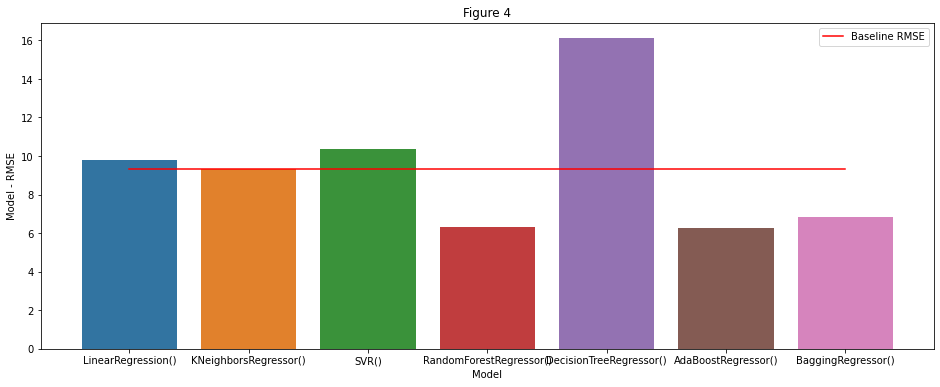

In [20]:
plt.figure(figsize=(16,6))
sns.barplot(data=dfb1, x=dfb1.index, y='Model - RMSE')
plt.plot(dfb1['Baseline - RMSE'], color='red', label='Baseline RMSE')
plt.legend()
plt.title('Figure 4')
#plt.savefig('../Images/pitcher_baseline');

In [144]:
value = [row for row in dfb1['Model - RMSE']]

In [145]:
x_data = [x for x in dfb1.index]

In [146]:
base = [row for row in dfb1['Baseline - RMSE']]

In [149]:
p = figure(x_range=x_data, plot_height=450, plot_width=975,title='Figure 4: Pitcher Baseline RMSE vs Model RMSE')
p.vbar(x=x_data, top=value, width=.9, fill_alpha=.65)
p.line(x=x_data, y=base, line_width=5, line_color='orange', legend='Baseline', line_alpha=.65)
p.legend.location = 'center_right'

In [150]:
show(p)

In [21]:
batter = pd.read_csv('../../Modeling_Data/batter_data_modeling.csv')

In [22]:
batter['FPPG'].mean()

7.087898762039455

In [23]:
pitcher = pd.read_csv('../../Modeling_Data/pitcher_data_modeling.csv')

In [24]:
pitcher['FPPG'].mean()

10.664786996731523

In [25]:
means = [batter['FPPG'].mean(), pitcher['FPPG'].mean()]

In [26]:
rmse_base = [dfb['Baseline - RMSE'][0], dfb1['Baseline - RMSE'][0]]

In [27]:
rmse_base

[3.0781594336221785, 9.344332308850891]

In [28]:
baseline = pd.DataFrame(data=[means, rmse_base], columns=['Batters', 'Pitchers'], index=['Avg_FPPG', 'Baseline_RMSE'])

Text(0.5, 1.0, 'Figure 1')

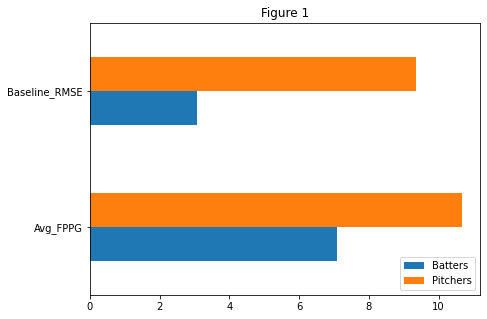

In [29]:
baseline.plot(figsize=(7,5), kind='barh')
plt.title('Figure 1')
#plt.savefig('../Images/rmse_baseline.jpg');

In [30]:
baseline.reset_index(drop=True, inplace=True)

In [31]:
baseline

,Batters,Pitchers
0,7.087899,10.664787
1,3.078159,9.344332


In [32]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import dodge

In [135]:
pos = ['Pitchers', 'Batters']
nums = ['FPPG Average', 'RMSE Baseline']

data = {'Position' : pos,
        'FPPG Average'   : [10.664787, 7.087899],
        'RMSE Baseline'   : [9.344332, 3.078159]}

source = ColumnDataSource(data=data)

p = figure(x_range=pos, y_range=(0, 15), plot_height=250, title="Figure 1: Baseline RMSE and FPPG Average")

p.vbar(x=dodge('Position', -0.25, range=p.x_range), top='FPPG Average', width=0.2, source=source,
       color='orange', legend_label="FPPG Average", fill_alpha=.8)

p.vbar(x=dodge('Position',  0.0,  range=p.x_range), top='RMSE Baseline', width=0.2, source=source,
       legend_label="RMSE Baseline", fill_alpha=.8)

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [151]:
# scatter plots
# batters
batter = pd.read_csv('../../Projections/batter_projections_2021.csv')
# pitchers
pitcher = pd.read_csv('../../Projections/pitcher_projections_2021.csv')

In [164]:
batter_plot = figure(plot_width=975, plot_height=450, title='Figure 3: Batter FPPG vs Projected FPPG ')
batter_plot.scatter('Projected_FPPG', 'FPPG', source=batter, fill_alpha=0.65,
                   size=7)
batter_plot.xaxis.axis_label = 'Projected FPPG'
batter_plot.yaxis.axis_label = 'Actual FPPG'

In [165]:
show(batter_plot)

In [166]:
pitcher_plot = figure(plot_width=975, plot_height=450, title='Figure 5: Pitcher FPPG vs Projected FPPG ')
pitcher_plot.scatter('Projected_FPPG', 'FPPG', source=pitcher, fill_alpha=0.65,
                   size=7)
pitcher_plot.xaxis.axis_label = 'Projected FPPG'
pitcher_plot.yaxis.axis_label = 'Actual FPPG'

In [167]:
show(pitcher_plot)